In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import kurtosis
from scipy.stats import skew, variation
# import pywt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
sns.set_style("white")

In [20]:
df = pd.read_csv("/home/ashish/Results/Datasets/Shimmer/MP/CleanedSignal/P11 MP A.csv")
# single_signal = np.array(df[df["sample_id"] == 1]["B8E3_Waist_Accel_LN_X"])
df

,Shimmer_B8C7_Accel_LN_X,Shimmer_B8C7_Accel_LN_Y,Shimmer_B8C7_Accel_LN_Z,Shimmer_B8C7_Gyro_X,Shimmer_B8C7_Gyro_Y,Shimmer_B8C7_Gyro_Z,Shimmer_B8C7_Mag_X,Shimmer_B8C7_Mag_Y,Shimmer_B8C7_Mag_Z,B8E3_Waist_Accel_LN_X,...,S548D_Left_Mag_Z,S57D0Waist_Accel_LN_X,S57D0Waist_Accel_LN_Y,S57D0Waist_Accel_LN_Z,S57D0Waist_Gyro_X,S57D0Waist_Gyro_Y,S57D0Waist_Gyro_Z,S57D0Waist_Mag_X,S57D0Waist_Mag_Y,S57D0Waist_Mag_Z
0,1.734940,8.445783,5.506024,-3.251908,5.618321,1.603053,-0.472727,-0.971818,0.680612,1.180723,...,0.195918,-1.951807,-7.710843,5.722892,-0.641221,1.633588,1.022901,0.206364,0.376364,-0.709184
1,1.674699,8.421687,5.493976,-2.717557,6.396947,0.946565,-0.471818,-0.975455,0.677551,0.855422,...,0.197959,-1.626506,-7.710843,5.650602,-0.595420,1.236641,1.511450,0.200909,0.375455,-0.709184
2,1.638554,8.397590,5.457831,-2.854962,4.549618,0.763359,-0.462727,-0.975455,0.679592,1.072289,...,0.195918,-1.879518,-7.710843,5.734940,-0.992366,2.717557,1.358779,0.209091,0.378182,-0.713265
3,1.722892,8.385542,5.481928,-3.114504,1.526718,0.961832,-0.477273,-0.978182,0.678571,1.060241,...,0.195918,-1.879518,-7.602410,5.795181,-0.839695,0.351145,1.083969,0.202727,0.380000,-0.708163
4,1.722892,8.421687,5.481928,-2.763359,1.633588,1.343511,-0.474545,-0.981818,0.676531,1.072289,...,0.198980,-1.939759,-7.566265,5.734940,-1.083969,-0.961832,1.068702,0.201818,0.380000,-0.713265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,2.409639,8.301205,5.493976,-2.931298,8.549618,0.152672,-0.483636,-0.975455,0.681633,0.626506,...,0.221429,-1.987952,-7.674699,5.530120,-1.984733,4.625954,0.992366,0.220909,0.387273,-0.712245
1061,2.325301,8.325301,5.397590,-3.938931,7.877863,2.045802,-0.481818,-0.970000,0.684694,0.674699,...,0.222449,-2.180723,-7.734940,5.867470,-2.732824,0.564885,1.725191,0.214545,0.376364,-0.712245
1062,2.313253,8.253012,5.277108,-3.664122,6.427481,3.297710,-0.477273,-0.983636,0.681633,0.843373,...,0.219388,-1.831325,-7.626506,5.674699,-3.679389,-0.122137,1.725191,0.223636,0.390909,-0.712245
1063,2.240964,8.168675,5.204819,-2.137405,4.412214,5.648855,-0.477273,-0.970909,0.681633,0.662651,...,0.219388,-1.939759,-7.638554,5.433735,-2.824427,0.809160,1.816794,0.216364,0.376364,-0.714286


In [15]:
cA, cD = pywt.dwt(single_signal, 'db5')

In [29]:
np.nanvar(cA)

7.633431399076006

In [24]:
coefficients_level1 = pywt.wavedec(single_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(single_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(single_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(single_signal, 'db2', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(single_signal, 'db2', 'smooth', level=5)
coefficients_level6 = pywt.wavedec(single_signal, 'db2', 'smooth', level=6)


In [25]:
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5

In [26]:
cA5_l5, cD5_l5

(array([-65.61495549,   4.15420387,  10.63711441,   6.03755281,
         -1.86170876,   4.53708368,  27.11653157]),
 array([-2.66453526e-15,  9.26925533e+00, -7.46257843e+00,  5.70871071e+00,
        -8.38246151e+00,  8.21164989e-01,  6.66133815e-16]))

In [53]:
def calc_energy(series):
    energy = np.sum(np.abs(series) ** 2)
    return [energy / len(series)]


def calc_fractal_dimension(series):
    """
     Compute Petrosian Fractal Dimension of a time series
    :param series:
    :return:
    """
    diff = np.diff(series)
    # x[i] * x[i-1] for i in t0 -> tmax
    prod = diff[1:-1] * diff[0:-2]

    # Number of sign changes in derivative of the signal
    N_delta = np.sum(prod < 0)
    n = len(series)
    fd = np.log(n) / (np.log(n) + np.log(n / (n + 0.4 * N_delta)))
    return [fd]


def calculate_statistics(series):
    n5 = np.nanpercentile(series, 5)
    n25 = np.nanpercentile(series, 25)
    n75 = np.nanpercentile(series, 75)
    median = np.nanpercentile(series, 50)
    mean = np.nanmean(series)
    std = np.nanstd(series)
    var = np.nanvar(series)
    rms = np.nanmean(np.sqrt(series ** 2))
    min_val = np.min(series)
    max_val = np.max(series)
    rng = max_val - min_val
    krt = kurtosis(series)
    skw = skew(series)
    return [n5, n25, n75, median, mean, std, var, rms, min_val, max_val, rng, krt, skw]


def calculate_crossings(list_values):
    zero_crossing_indices = np.nonzero(np.diff(np.array(list_values) > 0))[0]
    no_zero_crossings = len(zero_crossing_indices)
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) > np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return [no_mean_crossings]


def var_wavelet(series):
    c_a, c_d = pywt.dwt(series, 'db5')
    var_a = np.nanvar(c_a)
    var_d = np.nanvar(c_d)
    return [var_a, var_d]


def get_features(series):
    crossings = calculate_crossings(series)
    statistics = calculate_statistics(series)
    var_c_d = var_wavelet(series)
    fd = calc_fractal_dimension(series)
    energy = calc_energy(series)
    return crossings + statistics + var_c_d + fd + energy

In [35]:
statistics = calculate_statistics(single_signal)

In [37]:
calculate_crossings(single_signal)

[22, 22]

In [38]:
var_wavelet(single_signal)

[7.633431399076006, 0.4291986039597081]

In [39]:
calc_fractal_dimension(single_signal)

[1.0395362933105852]

In [40]:
calc_energy(single_signal)

[5.30887559466268]

In [54]:
l = get_features(single_signal)

In [55]:
len(l)

18

In [57]:
df.columns

Index(['Shimmer_B8C7_Accel_LN_X', 'Shimmer_B8C7_Accel_LN_Y',
       'Shimmer_B8C7_Accel_LN_Z', 'Shimmer_B8C7_Gyro_X', 'Shimmer_B8C7_Gyro_Y',
       'Shimmer_B8C7_Gyro_Z', 'Shimmer_B8C7_Mag_X', 'Shimmer_B8C7_Mag_Y',
       'Shimmer_B8C7_Mag_Z', 'B8E3_Waist_Accel_LN_X', 'B8E3_Waist_Accel_LN_Y',
       'B8E3_Waist_Accel_LN_Z', 'B8E3_Waist_Gyro_X', 'B8E3_Waist_Gyro_Y',
       'B8E3_Waist_Gyro_Z', 'B8E3_Waist_Mag_X', 'B8E3_Waist_Mag_Y',
       'B8E3_Waist_Mag_Z', 'S9276_Accel_LN_X', 'S9276_Accel_LN_Y',
       'S9276_Accel_LN_Z', 'S9276_Gyro_X', 'S9276_Gyro_Y', 'S9276_Gyro_Z',
       'S9276_Mag_X', 'S9276_Mag_Y', 'S9276_Mag_Z', 'S548D_Left_Accel_LN_X',
       'S548D_Left_Accel_LN_Y', 'S548D_Left_Accel_LN_Z', 'S548D_Left_Gyro_X',
       'S548D_Left_Gyro_Y', 'S548D_Left_Gyro_Z', 'S548D_Left_Mag_X',
       'S548D_Left_Mag_Y', 'S548D_Left_Mag_Z', 'S57D0Waist_Accel_LN_X',
       'S57D0Waist_Accel_LN_Y', 'S57D0Waist_Accel_LN_Z', 'S57D0Waist_Gyro_X',
       'S57D0Waist_Gyro_Y', 'S57D0Waist_Gyro_Z',

In [48]:
cols = ['Shimmer_B8C7_Mag_Y']

In [49]:
la = ["Mag_Y"]

In [23]:
from scipy.signal import savgol_filter, argrelextrema, find_peaks, peak_prominences


In [24]:
def smooth_coordinates_sf(raw_coordinates):
    """
    Smooth the coordinates using the savgol filter
    """
    try:
        smooth_coordinates = savgol_filter(raw_coordinates, 31, 3)
        return smooth_coordinates
    except Exception as e:
        logger.error("Error in smoothening the signal: {}".format(str(e)))
        return None

In [29]:
peaks_p4_a =[
            219,360,496,637,748,872,987,1098,1209,1310,1423]

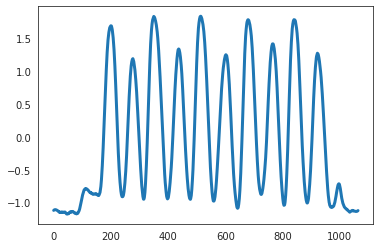

In [42]:
smooth_coordinates = smooth_coordinates_sf(df["Shimmer_B8C7_Mag_Y"])
smooth_coordinates = (smooth_coordinates - smooth_coordinates.mean())/smooth_coordinates.std()
plt.plot(smooth_coordinates, linewidth=3)
# plt.vlines(peaks_p11_a, ymin=0, ymax=30, colors='black',  lw=2)

In [15]:
len(df["Shimmer_B8C7_Mag_Y"])

817

In [32]:
peaks_p11_a = [156,240,315,398,478,560,643,726,805,886,974]

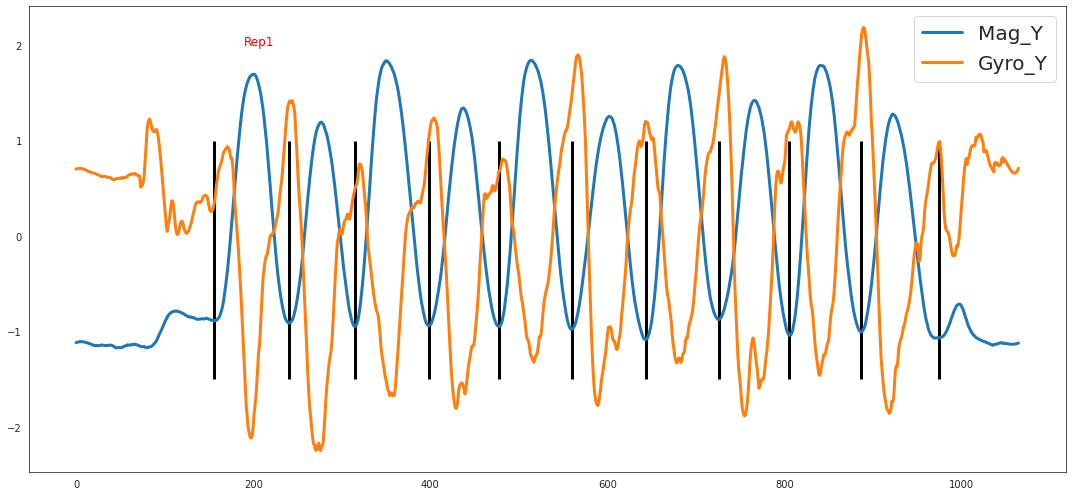

In [68]:
plt.figure(figsize=(15, 7))
cols = ['Shimmer_B8C7_Mag_Y', 'S57D0Waist_Accel_LN_Z']
la = ["Mag_Y", "Gyro_Y"]
for i in range(len(cols)):
    smooth_coordinates = smooth_coordinates_sf(df[cols[i]])
    smooth_coordinates = (smooth_coordinates - smooth_coordinates.mean())/smooth_coordinates.std()
    plt.plot(smooth_coordinates, label=la[i], linewidth=3)

plt.legend(fontsize=20, title_fontsize=10)
plt.tight_layout()
plt.vlines(peaks_p11_a, ymin=-1.5, ymax=1.0, colors='black',  lw=3)
plt.text(190, 2, "Rep1", fontsize=12, color="r")
plt.savefig("/tmp/one.png",)

In [25]:
df_hpe = pd.read_csv("/home/ashish/Results/Datasets/HPE3/MP/SegmentedCoordinates/P11_A.csv")

In [26]:
df_hpe.columns

Index(['Nose_X', 'Neck_X', 'RShoulder_X', 'RElbow_X', 'RWrist_X',
       'LShoulder_X', 'LElbow_X', 'LWrist_X', 'MidHip_X', 'RHip_X', 'RKnee_X',
       'RAnkle_X', 'LHip_X', 'LKnee_X', 'LAnkle_X', 'REye_X', 'LEye_X',
       'REar_X', 'LEar_X', 'LBigToe_X', 'LSmallToe_X', 'LHeel_X', 'RBigToe_X',
       'RSmallToe_X', 'RHeel_X', 'Nose_Y', 'Neck_Y', 'RShoulder_Y', 'RElbow_Y',
       'RWrist_Y', 'LShoulder_Y', 'LElbow_Y', 'LWrist_Y', 'MidHip_Y', 'RHip_Y',
       'RKnee_Y', 'RAnkle_Y', 'LHip_Y', 'LKnee_Y', 'LAnkle_Y', 'REye_Y',
       'LEye_Y', 'REar_Y', 'LEar_Y', 'LBigToe_Y', 'LSmallToe_Y', 'LHeel_Y',
       'RBigToe_Y', 'RSmallToe_Y', 'RHeel_Y', 'frame_number', 'frame_peaks',
       'pid', 'sample_id'],
      dtype='object')

In [32]:
cols_hpe = ['RShoulder_Y', 'RElbow_Y', 'RHip_Y']

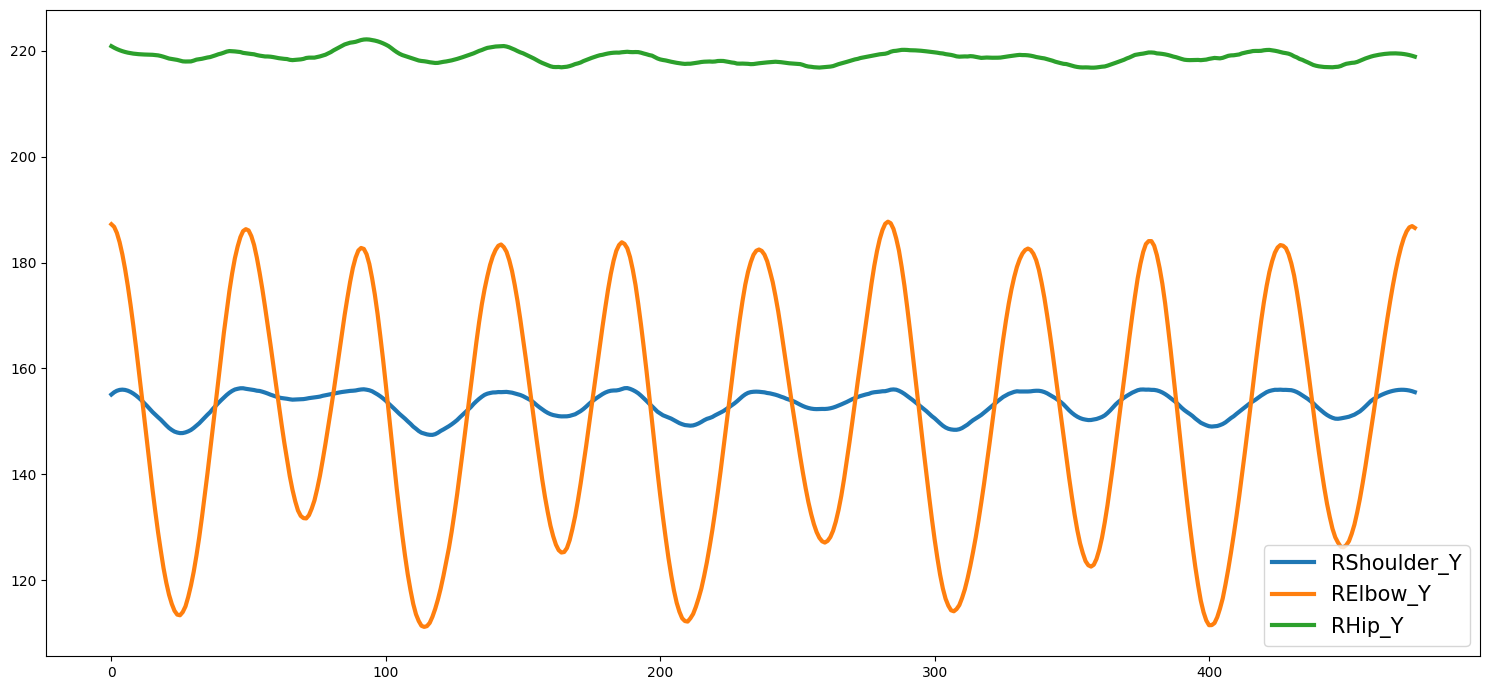

In [33]:
plt.figure(figsize=(15, 7))
for i in range(len(cols_hpe)):
    smooth_coordinates = smooth_coordinates_sf(df_hpe[cols_hpe[i]])
    plt.plot(smooth_coordinates, label=cols_hpe[i], linewidth=3)
plt.legend(fontsize=15, title_fontsize=10)
plt.tight_layout()
plt.savefig("/tmp/two.png", dpi=400)
